# 1. 해당 프로젝트는 머신러닝 다중 분류 모델을 사용하여 사용자가 선택한 설문조사에 맞춰 결과를 나타내는 프로젝트.

### 전제조건: 
- 사용자가 선택한 질문지에 대한 결과를 모두 알고 있어야 한다.
- 사용자가 선택한 결과에 대해 최종 점수를 알고 있어야 한다.

#### 특이사항
- 정형화된 데이터가 없기 때문에 필수적인 결과에 맞춰 target 을 우선 정의하고,  
이후 회사에서 원하는 결과를 비중있게 배치한 뒤 나머지는 무작위로 적용한다.
- 데이터 생성 후 추가 데이터 훈련이 필요한 경우 데이터셋으로 생성한 csv 파일을 참고한다.
#### 구조
- react 로 화면 구성을 진행하며, 백엔드는 xx(FastAPI 또는 Django) 를 사용하여 모델을 호출하여 결과를 예측한다.
- DB 의 경우 MySQL 을 사용하며 최초 구성시에는 임의로 데이터베이스를 생성하여 해당 데이터베이스로 데이터를 저장한다.
- 분류 기반의 모델을 사용할 예정이며 질문지 구성이 정해져 있기 때문에 정확도를 높이는 방향으로 모델을 구성하기로 결정한다.

In [2]:
# 데이터세트 feature 생성하기 (질문 20개 , 종합점수 1개, target 1개)
import pandas as pd
import numpy as np

features=[f"question_{i+1}" for i in range(20)]

origin_df = pd.DataFrame(0, columns=features, index=range(1,501), dtype=int)

# 결과 확인
display(origin_df)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,question_11,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# 각 질문지에 대한 랜덤한 숫자 부여
for feature in features:
    origin_df[feature] = np.random.randint(0,4,size=len(origin_df))

display(origin_df)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,question_11,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20
1,1,0,0,3,3,1,2,1,1,2,0,3,2,3,3,2,0,2,0,2
2,3,3,2,3,3,3,2,1,1,0,3,2,3,1,2,0,1,2,1,0
3,2,3,3,1,2,0,0,3,1,2,3,2,1,3,2,1,2,0,3,3
4,0,0,1,2,0,2,2,0,1,1,3,1,1,1,2,3,3,0,3,3
5,0,2,0,1,1,3,2,0,0,0,1,1,0,2,3,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,2,0,3,2,2,0,3,2,2,1,3,1,3,3,0,1,0
497,3,1,3,0,3,2,1,2,3,2,3,3,1,0,3,3,0,3,3,3
498,1,0,2,1,1,0,0,3,0,3,1,1,3,3,3,0,0,1,3,2
499,1,1,0,2,0,0,3,0,0,0,3,3,1,1,0,3,3,2,3,0


In [4]:
# feature (total_score, target) 2개 추가
# target에 대한 결과값 설정 (target을 단일 변수로 가져갈 지, 다중변수로 가져갈지 확인)
# 실제 추천 항목에 대해서는 총 3가지 리스트를 나타내야 하기 때문에 다중 변수로 설정)
# target_1,target_2,target_3 으로 추가 등록 
origin_df['total_score'] = [0] * 500
origin_df['target_1'] = [0] * 500
origin_df['target_2'] = [0] * 500
origin_df['target_3'] = [0] * 500

display(origin_df)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
1,1,0,0,3,3,1,2,1,1,2,...,3,2,0,2,0,2,0,0,0,0
2,3,3,2,3,3,3,2,1,1,0,...,2,0,1,2,1,0,0,0,0,0
3,2,3,3,1,2,0,0,3,1,2,...,2,1,2,0,3,3,0,0,0,0
4,0,0,1,2,0,2,2,0,1,1,...,2,3,3,0,3,3,0,0,0,0
5,0,2,0,1,1,3,2,0,0,0,...,3,1,3,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,2,0,3,2,2,0,3,...,1,3,3,0,1,0,0,0,0,0
497,3,1,3,0,3,2,1,2,3,2,...,3,3,0,3,3,3,0,0,0,0
498,1,0,2,1,1,0,0,3,0,3,...,3,0,0,1,3,2,0,0,0,0
499,1,1,0,2,0,0,3,0,0,0,...,0,3,3,2,3,0,0,0,0,0


In [5]:
# 각 feature에 대한 total_score 계산
origin_df["total_score"] = origin_df.sum(axis=1)

# 점수와 total_score를 정한 데이터 프레임 copy
re_df = origin_df.copy()
re_df

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
1,1,0,0,3,3,1,2,1,1,2,...,3,2,0,2,0,2,31,0,0,0
2,3,3,2,3,3,3,2,1,1,0,...,2,0,1,2,1,0,36,0,0,0
3,2,3,3,1,2,0,0,3,1,2,...,2,1,2,0,3,3,37,0,0,0
4,0,0,1,2,0,2,2,0,1,1,...,2,3,3,0,3,3,29,0,0,0
5,0,2,0,1,1,3,2,0,0,0,...,3,1,3,1,1,1,23,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,2,0,3,2,2,0,3,...,1,3,3,0,1,0,28,0,0,0
497,3,1,3,0,3,2,1,2,3,2,...,3,3,0,3,3,3,42,0,0,0
498,1,0,2,1,1,0,0,3,0,3,...,3,0,0,1,3,2,28,0,0,0
499,1,1,0,2,0,0,3,0,0,0,...,0,3,3,2,3,0,26,0,0,0


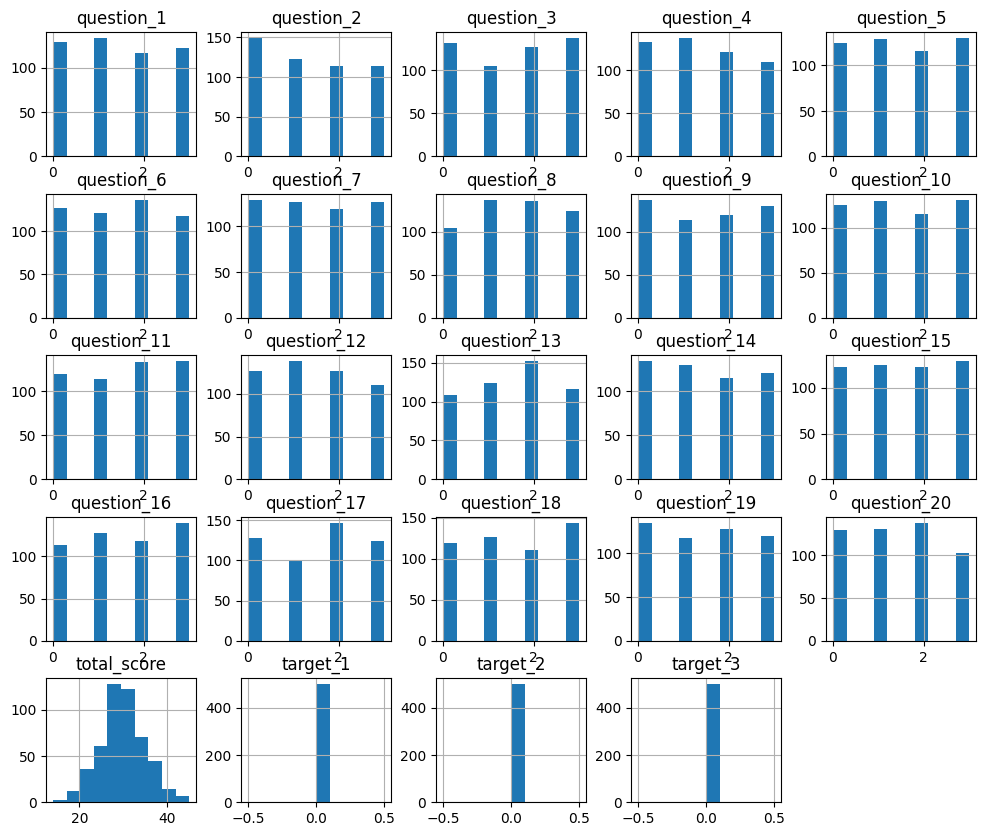

In [6]:
# 각 feature, total score 에 대한 히스토그램 확인
import matplotlib.pyplot as plt
import seaborn as sns

re_df.hist(figsize=(12,10))
plt.show()

In [7]:
# 각 질문에 맞춰 결과에 대한 비중 변경
# 각 질문지에 대한 비중 설정

# 질문에 대한 선택 비중은 변경되어야 함.
weights_1 = [1,6,2,1]
weights_2 = [0.5,6,2.5,1]
weights_3 = [1,2,5,2]
weights_4 = [1,4,3,2]
weights_5 = [0.5,5.5,2,2]
weights_6 = [7,0.25,0.75,2]
weights_7 = [0.5,2,6,1.5]
weights_8 = [1.5,4,3,2]
weights_9 = [1,4,3,2]
weights_10 = [6,2,1,1]
weights_11 = [0.5,2,1.5,6]
weights_12 = [7,0.5,1.5,0.5]
weights_13 = [2,1,4,3]
weights_14 = [2,6,1.5,0.5]
weights_15 = [1,1.5,4,3.5]
weights_16 = [0.5,1.5,4,4]
weights_17 = [1,2,4,3]
weights_18 = [1,2,4,3]
weights_19 = [0.5,4,4,1.5]
weights_20 = [0.5,1.5,3,5]




for i in range(20):
    # 변수명 동적으로 가져오기
    weights_var = globals()[f"weights_{i+1}"]
    proba = [w/sum(weights_var) for w in weights_var]
    re_df[f"question_{i+1}"] = np.random.choice([0,1,2,3], size=len(re_df), p=proba)

# 결과 확인
display(re_df)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
1,1,1,2,2,1,1,2,1,1,1,...,1,2,2,2,1,2,31,0,0,0
2,0,1,0,2,1,1,2,2,2,0,...,2,1,0,2,2,3,36,0,0,0
3,1,3,3,1,2,0,2,0,3,1,...,1,1,1,2,1,2,37,0,0,0
4,1,1,2,1,3,0,2,3,0,0,...,3,3,2,0,1,0,29,0,0,0
5,1,1,1,0,1,0,2,1,1,1,...,3,3,2,1,3,2,23,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,3,1,2,2,2,2,2,3,3,2,...,3,3,3,3,1,2,28,0,0,0
497,1,2,2,2,3,0,2,2,2,2,...,2,3,2,3,2,2,42,0,0,0
498,1,0,1,3,3,0,2,3,3,0,...,1,2,1,1,1,2,28,0,0,0
499,2,1,1,2,1,0,2,2,1,1,...,2,3,3,2,2,2,26,0,0,0


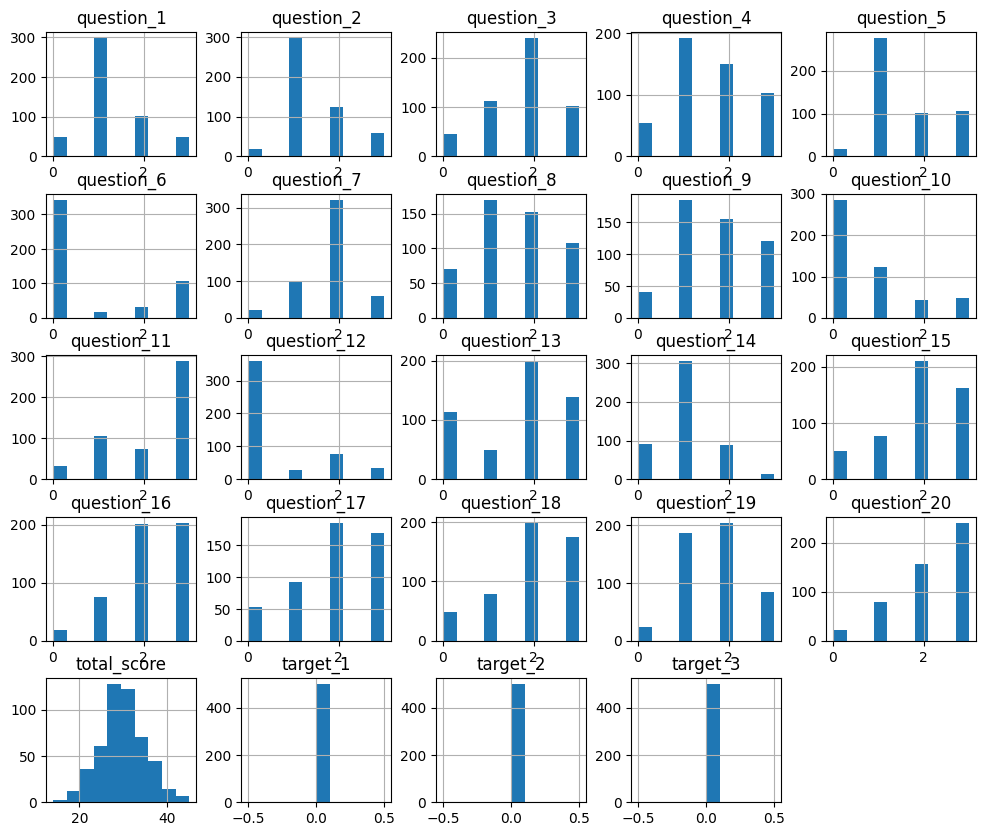

In [8]:
re_df.hist(figsize=(12,10))
plt.show()

In [9]:
# 비중이 변경된 데이터에 대한 total_score 계산
re_df["total_score"] = re_df.sum(axis=1)

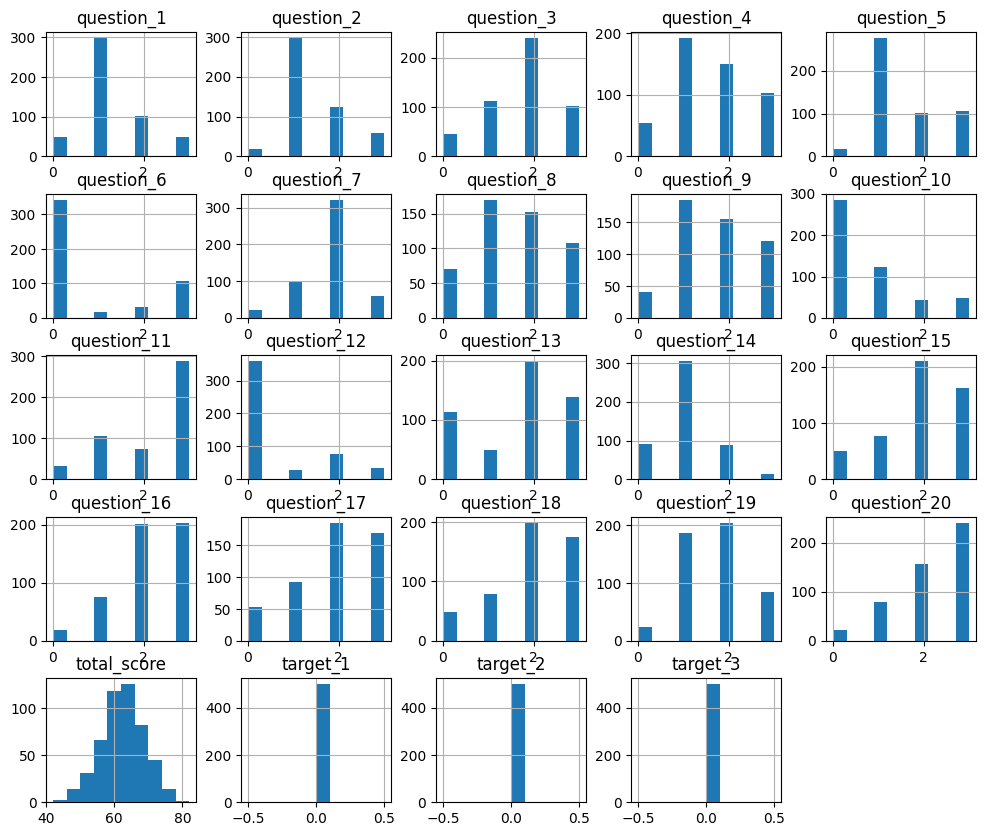

In [10]:
re_df.hist(figsize=(12,10))
plt.show()

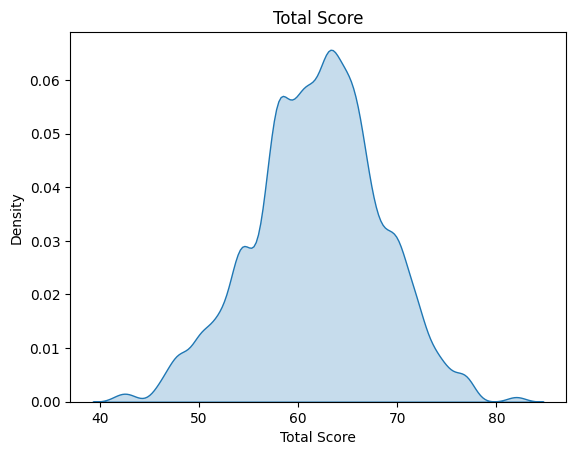

In [11]:
import seaborn as sns

# `total_score`의 고유값별 합계를 구함
sns.kdeplot(re_df["total_score"], fill=True, bw_adjust=0.5)  # KDE 플롯
plt.title("Total Score")
plt.xlabel("Total Score")
plt.ylabel("Density")
plt.show()


In [12]:
### 20문항 중 4점이 가장 많이 나타나는 경우이며 점수가 60 이상인 경우에 1순위 땅, 2순위 금, 3순위 예적금
# 20문항 중 4점이 가장 많이 나타나는 경우이며 점수가 60 미만인 경우에 1순위 금, 2순위 땅, 3순위 다른 무언가
# import ace_tools as tools
target_result={"개발예정지":1, "금":2, "예금/적금":3, "비트코인":4, "주식":5, "아파트":6}

question_cols = [f"question_{i+1}" for i in range(20)] 
most_common_3_count = (re_df[question_cols] == 3).sum(axis=1)  # 각 행에서 '3'의 개수 계산

# 3의 중간값 찾기
median_3_count = most_common_3_count.median()  
# plt.boxplot(most_common_3_count)

# 전체 행 중에 3이 중간값보다 높은 행과 total_score 점수가 60 점 이상인 행 선택
filtered_df = re_df[(most_common_3_count >= median_3_count) & (re_df["total_score"] >= 60)]
display(filtered_df)

# 원하는 숫자 변경
re_df.loc[filtered_df.index, "target_1"] = target_result["개발예정지"]

# 해당 숫자의 경우 높은 고소득자 자산을 나타내고 있기 때문에 개발예정지, 코인, 금 으로 지정
re_df.loc[filtered_df.index, "target_2"] = target_result["비트코인"]
re_df.loc[filtered_df.index, "target_3"] = target_result["금"]

display(re_df)


,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
6,2,2,1,1,3,0,2,1,1,1,...,3,3,3,2,2,3,63,0,0,0
7,1,2,1,1,1,0,2,2,3,0,...,3,2,3,3,1,3,71,0,0,0
9,1,2,2,2,1,0,2,2,3,0,...,3,2,2,3,2,3,61,0,0,0
10,1,1,3,3,1,0,1,0,1,1,...,3,2,2,3,1,3,64,0,0,0
12,2,3,3,2,1,0,0,3,3,1,...,0,3,2,3,1,3,62,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0,3,1,2,1,0,2,2,3,0,...,1,3,3,2,1,3,61,0,0,0
493,1,1,1,2,1,3,0,3,2,0,...,3,3,3,2,1,2,66,0,0,0
494,1,1,0,1,2,2,2,2,2,0,...,2,3,3,3,2,3,63,0,0,0
496,3,1,2,2,2,2,2,3,3,2,...,3,3,3,3,1,2,72,0,0,0


,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
1,1,1,2,2,1,1,2,1,1,1,...,1,2,2,2,1,2,60,0,0,0
2,0,1,0,2,1,1,2,2,2,0,...,2,1,0,2,2,3,62,0,0,0
3,1,3,3,1,2,0,2,0,3,1,...,1,1,1,2,1,2,65,0,0,0
4,1,1,2,1,3,0,2,3,0,0,...,3,3,2,0,1,0,58,0,0,0
5,1,1,1,0,1,0,2,1,1,1,...,3,3,2,1,3,2,48,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,3,1,2,2,2,2,2,3,3,2,...,3,3,3,3,1,2,72,1,4,2
497,1,2,2,2,3,0,2,2,2,2,...,2,3,2,3,2,2,82,1,4,2
498,1,0,1,3,3,0,2,3,3,0,...,1,2,1,1,1,2,59,0,0,0
499,2,1,1,2,1,0,2,2,1,1,...,2,3,3,2,2,2,58,0,0,0


In [13]:
# 198개의 행을 제외한 나머지 행 중에 점수가 70 점 이상인 행 선택
filtered_df = re_df[(re_df["total_score"] >= 70) & (re_df["target_1"]==0)]

# 9개
display(filtered_df)

# 원하는 숫자 변경
re_df.loc[filtered_df.index, "target_1"] = target_result["개발예정지"]

# 해당 숫자의 경우 높은 고소득자 자산을 나타내고 있기 때문에 개발예정지, 코인, 금 으로 지정
re_df.loc[filtered_df.index, "target_2"] = target_result["주식"]
re_df.loc[filtered_df.index, "target_3"] = target_result["비트코인"]

display(re_df)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
43,2,1,2,2,3,0,2,2,1,0,...,2,2,3,3,1,2,74,0,0,0
134,1,1,1,2,2,3,2,1,2,0,...,3,1,2,2,3,3,76,0,0,0
143,2,1,2,2,1,0,2,3,1,2,...,2,3,1,3,1,2,73,0,0,0
154,1,1,1,1,1,0,3,1,3,3,...,2,2,2,2,1,1,73,0,0,0
174,1,1,2,1,1,3,1,2,3,2,...,2,3,2,2,2,3,71,0,0,0
187,1,1,2,1,3,0,1,1,3,1,...,1,2,3,2,3,2,71,0,0,0
229,1,1,3,1,3,0,1,1,0,1,...,2,2,1,2,1,2,70,0,0,0
307,0,2,2,1,1,0,3,1,1,1,...,2,3,2,0,2,3,71,0,0,0
329,1,2,2,1,1,0,2,3,2,0,...,3,3,2,2,3,2,71,0,0,0
408,1,1,2,1,1,0,2,0,2,1,...,3,3,2,2,2,1,76,0,0,0


,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
1,1,1,2,2,1,1,2,1,1,1,...,1,2,2,2,1,2,60,0,0,0
2,0,1,0,2,1,1,2,2,2,0,...,2,1,0,2,2,3,62,0,0,0
3,1,3,3,1,2,0,2,0,3,1,...,1,1,1,2,1,2,65,0,0,0
4,1,1,2,1,3,0,2,3,0,0,...,3,3,2,0,1,0,58,0,0,0
5,1,1,1,0,1,0,2,1,1,1,...,3,3,2,1,3,2,48,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,3,1,2,2,2,2,2,3,3,2,...,3,3,3,3,1,2,72,1,4,2
497,1,2,2,2,3,0,2,2,2,2,...,2,3,2,3,2,2,82,1,4,2
498,1,0,1,3,3,0,2,3,3,0,...,1,2,1,1,1,2,59,0,0,0
499,2,1,1,2,1,0,2,2,1,1,...,2,3,3,2,2,2,58,0,0,0


In [14]:
# 198개의 행을 제외한 나머지 행 중에 점수가 60 점 이상인 행 선택
filtered_df = re_df[(re_df["total_score"] >= 60) & (re_df["target_1"]==0)]

display(filtered_df)

# 원하는 숫자 변경
re_df.loc[filtered_df.index, "target_1"] = target_result["개발예정지"]
re_df.loc[filtered_df.index, "target_2"] = target_result["비트코인"]
re_df.loc[filtered_df.index, "target_3"] = target_result["금"]

display(re_df)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
1,1,1,2,2,1,1,2,1,1,1,...,1,2,2,2,1,2,60,0,0,0
2,0,1,0,2,1,1,2,2,2,0,...,2,1,0,2,2,3,62,0,0,0
3,1,3,3,1,2,0,2,0,3,1,...,1,1,1,2,1,2,65,0,0,0
21,1,2,2,1,2,0,2,1,2,0,...,2,3,2,3,2,3,68,0,0,0
24,0,2,2,1,2,1,2,1,2,0,...,3,2,2,3,2,3,63,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,1,1,2,2,1,0,0,1,3,3,...,1,1,2,2,2,2,60,0,0,0
473,1,1,2,2,1,0,2,3,1,0,...,2,1,3,2,3,3,65,0,0,0
476,1,1,1,1,2,0,2,1,1,0,...,2,1,2,3,3,1,60,0,0,0
478,2,2,3,0,1,3,2,1,3,0,...,2,2,1,2,1,2,67,0,0,0


,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
1,1,1,2,2,1,1,2,1,1,1,...,1,2,2,2,1,2,60,1,4,2
2,0,1,0,2,1,1,2,2,2,0,...,2,1,0,2,2,3,62,1,4,2
3,1,3,3,1,2,0,2,0,3,1,...,1,1,1,2,1,2,65,1,4,2
4,1,1,2,1,3,0,2,3,0,0,...,3,3,2,0,1,0,58,0,0,0
5,1,1,1,0,1,0,2,1,1,1,...,3,3,2,1,3,2,48,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,3,1,2,2,2,2,2,3,3,2,...,3,3,3,3,1,2,72,1,4,2
497,1,2,2,2,3,0,2,2,2,2,...,2,3,2,3,2,2,82,1,4,2
498,1,0,1,3,3,0,2,3,3,0,...,1,2,1,1,1,2,59,0,0,0
499,2,1,1,2,1,0,2,2,1,1,...,2,3,3,2,2,2,58,0,0,0


In [15]:
# 40점 이하인 행 확인
filtered_df = re_df[(re_df["total_score"] <= 45)& (re_df["target_1"]==0)]

display(filtered_df)

# 원하는 숫자 변경
re_df.loc[filtered_df.index, "target_1"] = target_result["예금/적금"]

# 해당 숫자의 경우 높은 고소득자 자산을 나타내고 있기 때문에 개발예정지, 코인, 금 으로 지정
re_df.loc[filtered_df.index, "target_2"] = target_result["금"]
re_df.loc[filtered_df.index, "target_3"] = target_result["비트코인"]

display(re_df)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
65,1,1,1,0,0,0,2,1,3,0,...,2,1,2,0,1,1,43,0,0,0
390,2,1,1,1,0,0,2,1,2,2,...,0,2,1,2,2,2,42,0,0,0


,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
1,1,1,2,2,1,1,2,1,1,1,...,1,2,2,2,1,2,60,1,4,2
2,0,1,0,2,1,1,2,2,2,0,...,2,1,0,2,2,3,62,1,4,2
3,1,3,3,1,2,0,2,0,3,1,...,1,1,1,2,1,2,65,1,4,2
4,1,1,2,1,3,0,2,3,0,0,...,3,3,2,0,1,0,58,0,0,0
5,1,1,1,0,1,0,2,1,1,1,...,3,3,2,1,3,2,48,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,3,1,2,2,2,2,2,3,3,2,...,3,3,3,3,1,2,72,1,4,2
497,1,2,2,2,3,0,2,2,2,2,...,2,3,2,3,2,2,82,1,4,2
498,1,0,1,3,3,0,2,3,3,0,...,1,2,1,1,1,2,59,0,0,0
499,2,1,1,2,1,0,2,2,1,1,...,2,3,3,2,2,2,58,0,0,0


In [16]:
# 40점 이하인 행 확인
filtered_df = re_df[(re_df["total_score"] >= 55)& (re_df["target_1"]==0)]

display(filtered_df)

# 원하는 숫자 변경
re_df.loc[filtered_df.index, "target_1"] = target_result["아파트"]
re_df.loc[filtered_df.index, "target_2"] = target_result["비트코인"]
re_df.loc[filtered_df.index, "target_3"] = target_result["개발예정지"]

display(re_df)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
4,1,1,2,1,3,0,2,3,0,0,...,3,3,2,0,1,0,58,0,0,0
11,1,1,0,2,1,0,2,1,1,1,...,3,2,2,2,1,1,59,0,0,0
13,1,3,2,3,1,0,2,0,0,0,...,2,1,3,2,1,2,56,0,0,0
15,2,1,2,1,1,0,2,3,1,0,...,2,1,2,2,1,3,57,0,0,0
18,1,0,2,1,1,0,2,1,2,0,...,2,1,2,1,3,3,55,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0,1,3,1,1,0,3,2,1,1,...,3,1,3,3,2,0,58,0,0,0
495,2,1,2,1,1,0,2,3,3,0,...,2,3,3,1,1,2,58,0,0,0
498,1,0,1,3,3,0,2,3,3,0,...,1,2,1,1,1,2,59,0,0,0
499,2,1,1,2,1,0,2,2,1,1,...,2,3,3,2,2,2,58,0,0,0


,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
1,1,1,2,2,1,1,2,1,1,1,...,1,2,2,2,1,2,60,1,4,2
2,0,1,0,2,1,1,2,2,2,0,...,2,1,0,2,2,3,62,1,4,2
3,1,3,3,1,2,0,2,0,3,1,...,1,1,1,2,1,2,65,1,4,2
4,1,1,2,1,3,0,2,3,0,0,...,3,3,2,0,1,0,58,6,4,1
5,1,1,1,0,1,0,2,1,1,1,...,3,3,2,1,3,2,48,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,3,1,2,2,2,2,2,3,3,2,...,3,3,3,3,1,2,72,1,4,2
497,1,2,2,2,3,0,2,2,2,2,...,2,3,2,3,2,2,82,1,4,2
498,1,0,1,3,3,0,2,3,3,0,...,1,2,1,1,1,2,59,6,4,1
499,2,1,1,2,1,0,2,2,1,1,...,2,3,3,2,2,2,58,6,4,1


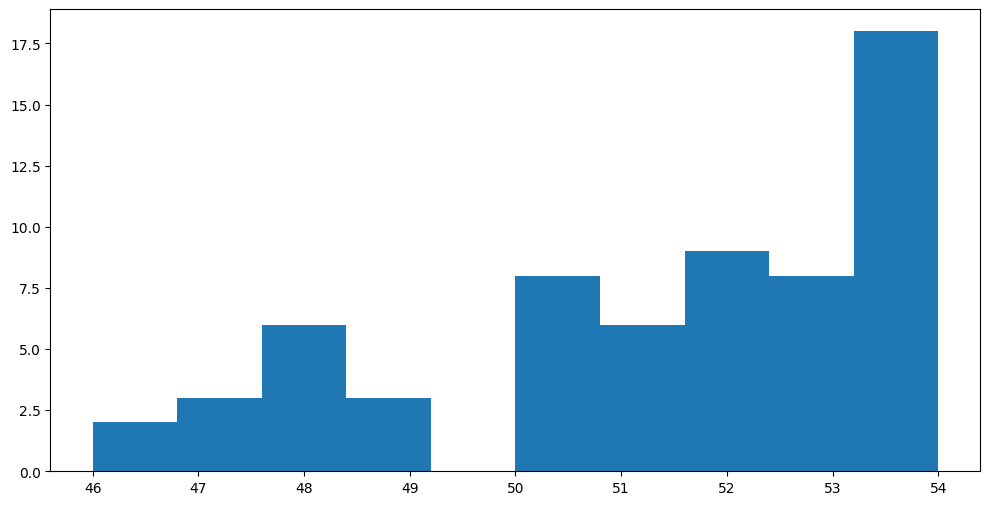

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
5,1,1,1,0,1,0,2,1,1,1,...,3,3,2,1,3,2,48,0,0,0
8,0,1,3,0,2,0,3,3,2,1,...,3,2,2,2,0,0,54,0,0,0
16,0,1,2,2,3,0,2,1,0,2,...,0,2,1,1,1,3,50,0,0,0
19,3,1,2,2,1,3,2,1,1,0,...,0,2,3,2,2,0,53,0,0,0
31,2,2,3,1,1,0,2,0,2,0,...,0,1,0,1,2,1,54,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2,2,0,1,1,0,1,0,2,2,...,1,0,3,3,2,2,50,0,0,0
460,1,2,2,2,1,3,0,2,2,0,...,0,2,1,0,2,2,47,0,0,0
465,1,2,2,1,1,0,2,1,2,0,...,3,1,0,2,1,1,49,0,0,0
483,1,2,2,1,1,0,2,2,1,0,...,1,3,3,2,0,1,51,0,0,0


In [17]:
# 그 외 나머지
filtered_df = re_df[(re_df["target_1"] == 0)]
plt.figure(figsize=(12,6))
plt.hist(filtered_df.total_score)
plt.show()
display(filtered_df)

In [18]:
# display(target_result)
# # 주식, 금, 예금
# display(re_df[re_df["target_1"]==0])

# 그 외 나머지
filtered_df = re_df[(re_df["target_1"] == 0)]

# 원하는 숫자 변경
re_df.loc[filtered_df.index, "target_1"] = target_result["주식"]
re_df.loc[filtered_df.index, "target_2"] = target_result["금"]
re_df.loc[filtered_df.index, "target_3"] = target_result["예금/적금"]

display(filtered_df)
display(re_df)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
5,1,1,1,0,1,0,2,1,1,1,...,3,3,2,1,3,2,48,0,0,0
8,0,1,3,0,2,0,3,3,2,1,...,3,2,2,2,0,0,54,0,0,0
16,0,1,2,2,3,0,2,1,0,2,...,0,2,1,1,1,3,50,0,0,0
19,3,1,2,2,1,3,2,1,1,0,...,0,2,3,2,2,0,53,0,0,0
31,2,2,3,1,1,0,2,0,2,0,...,0,1,0,1,2,1,54,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2,2,0,1,1,0,1,0,2,2,...,1,0,3,3,2,2,50,0,0,0
460,1,2,2,2,1,3,0,2,2,0,...,0,2,1,0,2,2,47,0,0,0
465,1,2,2,1,1,0,2,1,2,0,...,3,1,0,2,1,1,49,0,0,0
483,1,2,2,1,1,0,2,2,1,0,...,1,3,3,2,0,1,51,0,0,0


,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
1,1,1,2,2,1,1,2,1,1,1,...,1,2,2,2,1,2,60,1,4,2
2,0,1,0,2,1,1,2,2,2,0,...,2,1,0,2,2,3,62,1,4,2
3,1,3,3,1,2,0,2,0,3,1,...,1,1,1,2,1,2,65,1,4,2
4,1,1,2,1,3,0,2,3,0,0,...,3,3,2,0,1,0,58,6,4,1
5,1,1,1,0,1,0,2,1,1,1,...,3,3,2,1,3,2,48,5,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,3,1,2,2,2,2,2,3,3,2,...,3,3,3,3,1,2,72,1,4,2
497,1,2,2,2,3,0,2,2,2,2,...,2,3,2,3,2,2,82,1,4,2
498,1,0,1,3,3,0,2,3,3,0,...,1,2,1,1,1,2,59,6,4,1
499,2,1,1,2,1,0,2,2,1,1,...,2,3,3,2,2,2,58,6,4,1


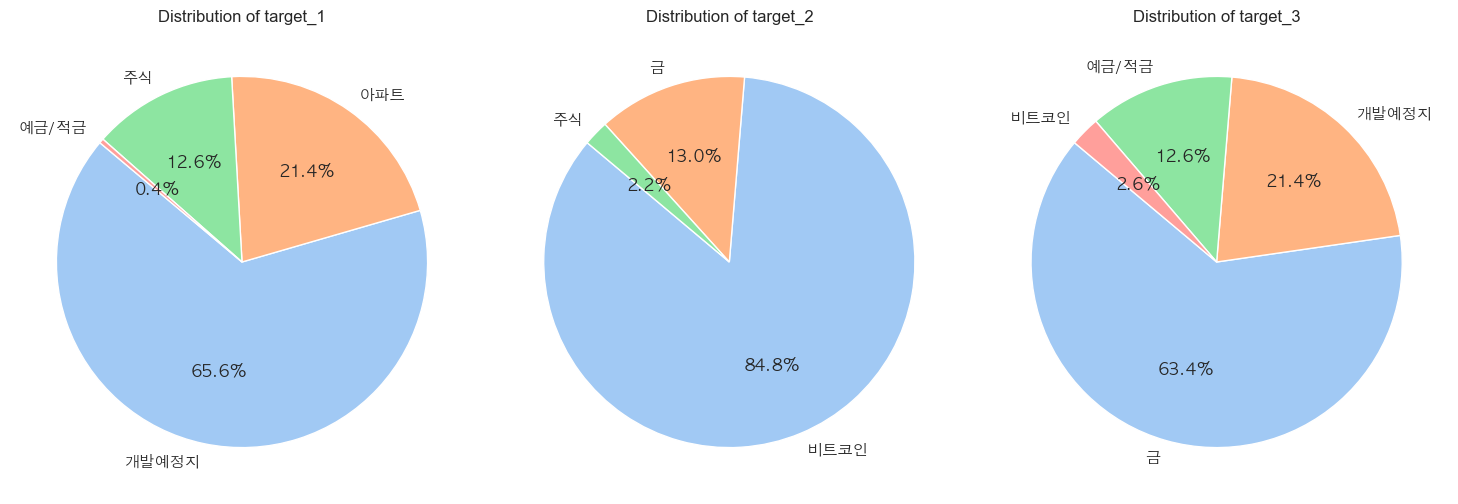

In [19]:
from matplotlib import rc  
rc('font', family='AppleGothic') 		
plt.rcParams['axes.unicode_minus'] = False  


target_result_reverse = {v:k for k,v in target_result.items()} 
# 각 target의 비중에 대하여 pie plot 으로 표현
target_1_count=re_df.target_1.value_counts()
target_2_count=re_df.target_2.value_counts()
target_3_count=re_df.target_3.value_counts()

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 기존 데이터에서 target별 비율 계산
target_counts = [target_1_count, target_2_count, target_3_count]
target_names = ["target_1", "target_2", "target_3"]

# 서브플롯 설정 (3개의 타겟에 대해 개별 파이 차트)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 각 target 컬럼에 대해 파이 차트 생성
for i, (count, name) in enumerate(zip(target_counts, target_names)):
    labels = list(count.index.map(target_result_reverse.get))  
    
    # 파이 차트 생성
    rc('font', family='AppleGothic') 		
    plt.rcParams['axes.unicode_minus'] = False  
    
    axes[i].pie(count, labels=labels, autopct="%1.1f%%", startangle=140, 
                colors=sns.color_palette("pastel"))
    axes[i].set_title(f"Distribution of {name}")

plt.tight_layout()
plt.show()


In [20]:
# target 비중 확인 결과 target 에 들어가지 않은 결과가 있음
# 필요시 적절한 값을 추가해주는 상황도 고려할 필요가 있음

## 모델 설정
- target이 1개가 아닌 다중 target을 가지고 있음. (다중 클래스-다중 출력 지원) 모델을 사용 필요.
- MultiOutputClassifier 모델 사용 예정.
- 높은 수준의 예측 결과를 나타내는 부분이 이니기 때문에 트리 모델을 사용하나 비교를 진행하기위해 앙상블 모델도 비교 분삭 진행

In [21]:
retire_df = re_df.copy()
retire_df.head()

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_15,question_16,question_17,question_18,question_19,question_20,total_score,target_1,target_2,target_3
1,1,1,2,2,1,1,2,1,1,1,...,1,2,2,2,1,2,60,1,4,2
2,0,1,0,2,1,1,2,2,2,0,...,2,1,0,2,2,3,62,1,4,2
3,1,3,3,1,2,0,2,0,3,1,...,1,1,1,2,1,2,65,1,4,2
4,1,1,2,1,3,0,2,3,0,0,...,3,3,2,0,1,0,58,6,4,1
5,1,1,1,0,1,0,2,1,1,1,...,3,3,2,1,3,2,48,5,2,3


In [22]:
# 훈련, 테스트, 검증 데이터 설정
from sklearn.model_selection import train_test_split

features = retire_df.iloc[:,:-3]
targets = retire_df.iloc[:,-3:]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=321)

X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=321)

display(X_train)
display(X_eval)
display(X_test)

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20,total_score
11,1,1,0,2,1,0,2,1,1,1,...,0,0,2,3,2,2,2,1,1,59
54,1,1,2,2,2,1,2,3,1,0,...,0,2,1,3,1,3,3,2,3,67
193,2,2,2,2,0,0,2,3,1,1,...,0,3,1,1,2,3,0,2,3,65
46,1,3,2,2,3,3,2,2,3,0,...,0,2,0,3,3,3,2,2,3,66
269,1,1,2,0,1,0,2,0,3,3,...,3,1,1,2,3,2,2,3,3,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,3,1,1,1,3,0,2,2,1,2,...,0,1,1,1,0,2,3,1,3,50
158,1,2,2,1,1,0,2,2,2,0,...,2,1,1,2,3,2,1,2,2,58
377,1,1,2,0,1,0,2,1,2,1,...,0,3,0,1,2,3,1,2,3,62
173,3,1,1,1,1,0,2,3,2,1,...,0,2,1,2,2,3,2,2,2,60


,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20,total_score
113,1,1,3,1,1,0,3,0,1,0,...,0,2,0,1,3,1,3,1,0,64
235,2,2,1,1,1,0,2,3,2,2,...,0,0,1,2,2,0,2,2,2,55
334,0,2,3,1,2,0,2,1,3,2,...,2,2,1,2,2,1,3,2,3,66
238,1,1,2,1,3,0,2,2,3,0,...,2,1,1,1,3,3,3,2,3,63
341,1,0,2,3,2,0,2,1,1,0,...,0,1,3,2,0,2,2,2,2,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1,1,1,1,1,0,0,1,1,0,...,2,2,2,2,3,1,2,2,3,50
105,0,1,2,1,1,0,2,1,2,3,...,0,2,1,2,2,3,3,1,3,66
175,2,3,2,2,3,2,2,2,2,1,...,2,2,2,2,3,1,3,0,3,77
479,1,1,2,3,3,0,1,2,1,1,...,1,0,3,2,2,0,2,1,3,70


,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,...,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20,total_score
311,3,1,2,3,1,0,3,0,0,0,...,0,1,1,2,2,0,2,2,1,56
70,1,1,2,1,1,0,2,0,1,3,...,0,2,0,1,1,2,3,3,1,61
413,1,3,0,1,3,0,3,0,3,3,...,0,2,0,3,2,1,0,2,2,58
180,0,1,0,3,1,0,2,1,3,0,...,0,0,1,0,3,3,1,1,2,51
43,2,1,2,2,3,0,2,2,1,0,...,2,2,0,2,2,3,3,1,2,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,3,3,3,2,2,0,2,1,0,0,...,0,2,2,2,2,2,1,1,3,66
5,1,1,1,0,1,0,2,1,1,1,...,0,0,0,3,3,2,1,3,2,48
443,3,1,1,2,1,0,2,0,2,0,...,0,2,0,2,2,2,2,1,2,62
399,1,2,0,1,3,3,2,3,1,3,...,0,3,0,0,3,2,1,3,3,68


In [23]:
# 트리 모델 사용
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier

# 단일 결정트리 모델을 여러 타겟에 적용하는 Multi-Output 모델
base_tree_model = DecisionTreeClassifier(max_depth=10)
multi_output_tree_model = MultiOutputClassifier(base_tree_model)

In [24]:
# 학습
multi_output_tree_model.fit(X_train,y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=10))

In [25]:
# 예측
y_eval_pred = multi_output_tree_model.predict(X_eval)
y_pred = multi_output_tree_model.predict(X_test)

print(f"y_eval_pred: {y_eval_pred}")
print(f"y_pred: {y_pred}")

y_eval_pred: [[1 4 2]
 [6 4 1]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [5 2 3]
 [1 5 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [5 2 3]
 [5 2 3]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [6 4 1]
 [6 4 1]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [5 2 3]
 [1 4 2]
 [1 4 2]
 [1 5 2]
 [1 4 4]
 [1 4 2]
 [1 4 2]
 [6 4 1]
 [6 4 1]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 4]
 [5 2 3]
 [6 4 1]
 [1 4 2]
 [6 4 1]
 [6 4 1]
 [6 4 1]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [6 4 1]
 [1 4 2]
 [6 4 1]
 [6 4 1]
 [6 4 1]
 [6 4 1]
 [1 4 2]
 [1 4 2]
 [6 4 1]
 [1 4 2]
 [5 2 3]
 [5 2 3]
 [5 2 3]
 [5 2 3]
 [1 4 2]
 [6 4 1]
 [1 5 2]
 [1 4 2]
 [5 2 3]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [6 4 1]]
y_pred: [[6 4 1]
 [1 4 2]
 [6 4 1]
 [5 2 3]
 [1 4 4]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [5 2 3]
 [1 4 2]
 [6 4 1]
 [1 4 2]
 [6 4 1]
 [1 4 2]
 [5 2 3]
 [1 4 2]
 [5 2 3]
 [1 4 2]
 [1 4 2]
 [6 4 1]
 [1 4 4]
 [5 2 3]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 

In [26]:
# 검증 및 테스트 정확도 평가
from sklearn.metrics import accuracy_score

for i, target in enumerate(targets.columns):
    eval_acc = accuracy_score(y_eval[target], y_eval_pred[:, i])
    test_acc = accuracy_score(y_test[target], y_pred[:, i])
    print(f"Target: {target} -> Validation Accuracy: {eval_acc:.4f}, Test Accuracy: {test_acc:.4f}")

# 해당 부분은 정확도가 매우 높은 형태로 과적합일 가능성이 매우 높을 것이라고 판단.

Target: target_1 -> Validation Accuracy: 0.9875, Test Accuracy: 0.9900
Target: target_2 -> Validation Accuracy: 0.9375, Test Accuracy: 0.9600
Target: target_3 -> Validation Accuracy: 0.9375, Test Accuracy: 0.9700


In [27]:
import numpy as np
import pandas as pd

# 새로운 입력 데이터 예제 (feature 21개)
new_sample = np.array([[1, 2, 3, 0, 1, 2, 3, 0, 4, 4, 
                        1, 2, 3, 0, 1, 2, 3, 0, 3, 4, 80]])

# 예측 수행
predicted_output = multi_output_tree_model.predict(new_sample)

# 예측 결과 출력
print("예측 결과 (Target 1, Target 2, Target 3):", predicted_output)
print("======")

for i in range(3):
    result_kor = target_result_reverse[predicted_output[0][i]]
    print(f"예측 결과: target_{i+1}: {result_kor}")
print("======")

## 1,2,3 target 이 같은 숫자가 나타나면 차선책으로 다음 확률의 결과를 나타내야한다

예측 결과 (Target 1, Target 2, Target 3): [[1 4 4]]
예측 결과: target_1: 개발예정지
예측 결과: target_2: 비트코인
예측 결과: target_3: 비트코인


/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [28]:
# 중복된 값을 처리하기 위한 확률 기반 적용
# 예측 확률 가져오기 
predicted_probs = multi_output_tree_model.predict_proba(new_sample)

# 예측된 클래스 확인
predicted_output = multi_output_tree_model.predict(new_sample)

print("예측 확률:")
for i in range(3):
    print(f"Target {i+1} 확률 분포: {predicted_probs[i]}")

print("\n예측 결과 (Target 1, Target 2, Target 3):", predicted_output)

# 중복된 값이 있는지 확인
unique_values = set(predicted_output[0])
if len(unique_values) < 3:  # 중복된 값이 있을 경우
    print("\n[중복 감지] 예측값 중복 발생, 차선책 적용\n")

    # 대체 추천 클래스 계산
    for i in range(3):  # 각 타겟에 대해 처리
        sorted_prob_indexes = np.argsort(predicted_probs[i][0])[::-1]  # 높은 확률 순서로 정렬

        # 현재 예측값
        current_class = predicted_output[0][i]
        print(f"Target {i+1} 현재 클래스: {current_class} ({target_result_reverse[current_class]})")

        # 대체 추천 클래스 선택
        alt_class = None
        for idx in sorted_prob_indexes:
            if idx != current_class:  # 현재 클래스가 아닌 다른 클래스 선택
                alt_class = idx
                break

        # 결과 출력
        if alt_class is not None:
            print(f"→ Target {i+1} 대체 추천 클래스: {alt_class} ({target_result_reverse[alt_class+1]})\n")
        else:
            alt_class = sorted_prob_indexes[1]  # 두 번째로 높은 확률 클래스 선택
            print(f"→ Target {i+1} 대체 추천 클래스 없음 (확률 분포가 편향됨)")
else:
    print("\n중복 없는 예측 결과입니다.")

print("======")

예측 확률:
Target 1 확률 분포: [[1. 0. 0.]]
Target 2 확률 분포: [[0. 1. 0.]]
Target 3 확률 분포: [[0. 0. 0. 1.]]

예측 결과 (Target 1, Target 2, Target 3): [[1 4 4]]

[중복 감지] 예측값 중복 발생, 차선책 적용

Target 1 현재 클래스: 1 (개발예정지)
→ Target 1 대체 추천 클래스: 0 (개발예정지)

Target 2 현재 클래스: 4 (비트코인)
→ Target 2 대체 추천 클래스: 1 (금)

Target 3 현재 클래스: 4 (비트코인)
→ Target 3 대체 추천 클래스: 3 (비트코인)



/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have 

In [29]:
# !pip install xgboost
# !pip install lightgbm

In [30]:
# 트리 모델이 아닌 앙상블 모델 사용
# XGB 모델을 사용하려 했으나 target의 값이 0부터 시작해야 되는 형태여서 LGBM
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.multioutput import MultiOutputClassifier

lgb= LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=321)
multi_output_lgb_model = MultiOutputClassifier(lgb)

In [31]:
# 학습
multi_output_lgb_model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 109
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 21
[LightGBM] [Info] Start training from score -0.435602
[LightGBM] [Info] Start training from score -2.054749
[LightGBM] [Info] Start training from score -1.491655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

MultiOutputClassifier(estimator=LGBMClassifier(max_depth=5, random_state=321))

In [32]:
# 각 타겟별 feature_importances_ 출력
for i, estimator in enumerate(multi_output_lgb_model.estimators_):
    importances = estimator.feature_importances_
    print(f"Feature Importances for Target {i+1}: {importances}\n")

Feature Importances for Target 1: [ 71  59  18  43  16  10   5  27  19   5   9   3   2   1  34   5   6   3
  12   0 529]

Feature Importances for Target 2: [109  77  20 114 145  37  37  68  54  58 146  70  25 127  67  48  31 135
  60  40 909]

Feature Importances for Target 3: [ 141   69   22  171  156   28   23  123   54   35   83   73   30  121
  116   55   15  146   96   58 1340]



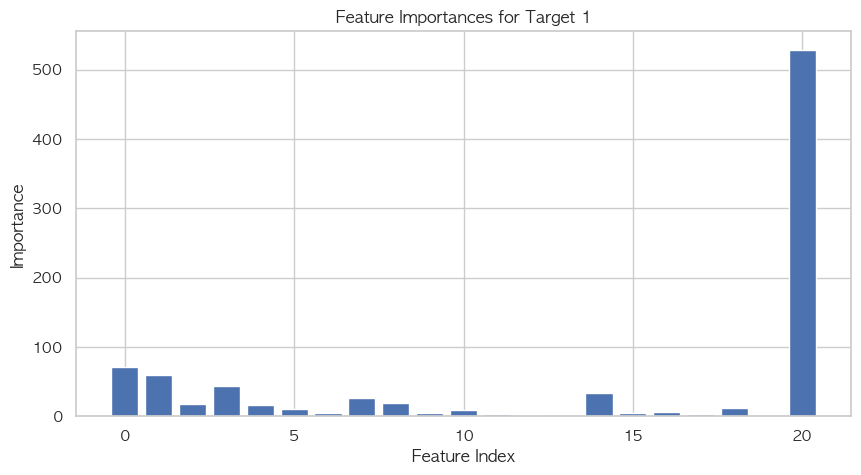

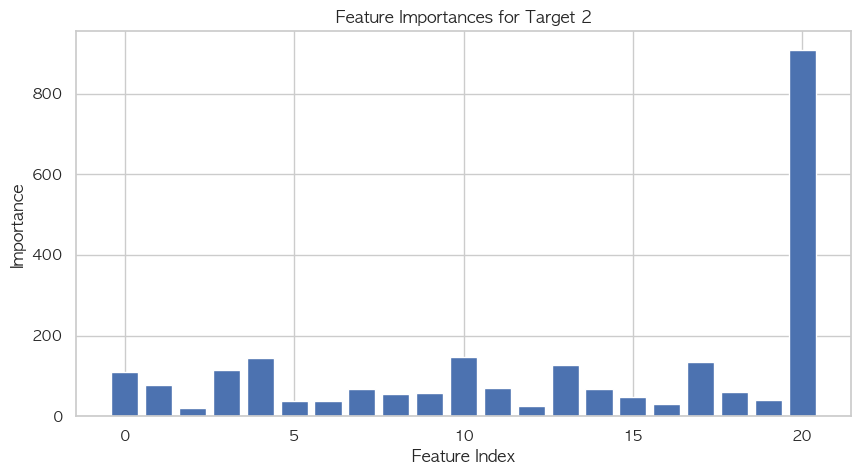

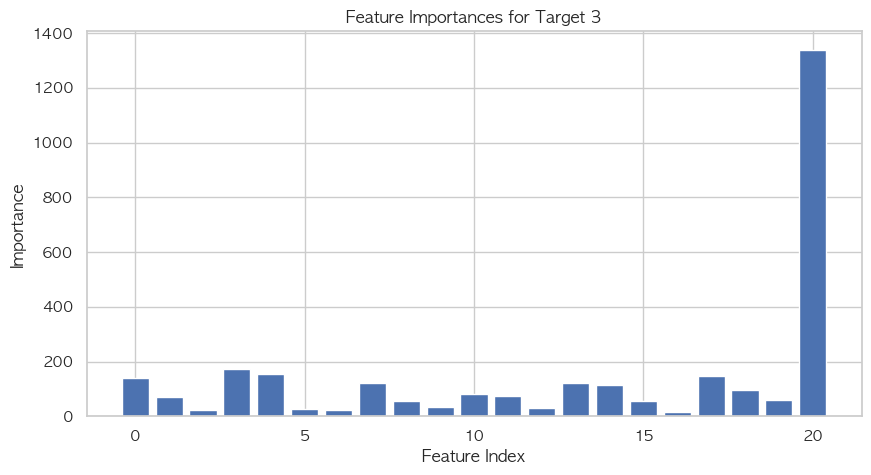

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# 각 타겟별 Feature Importance 시각화
for i, estimator in enumerate(multi_output_lgb_model.estimators_):
    importances = estimator.feature_importances_
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(importances)), importances)
    plt.title(f"Feature Importances for Target {i+1}")
    plt.xlabel("Feature Index")
    plt.ylabel("Importance")
    plt.show()


In [34]:
# 예측
y_eval_pred = multi_output_lgb_model.predict(X_eval)
y_pred = multi_output_lgb_model.predict(X_test)

print(f"y_eval_pred: {y_eval_pred}")
print(f"y_pred: {y_pred}")

y_eval_pred: [[1 4 2]
 [6 4 1]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [5 2 3]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [5 2 3]
 [5 2 3]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [6 4 1]
 [6 4 1]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [5 2 3]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 4]
 [1 4 2]
 [1 4 2]
 [6 4 1]
 [6 4 1]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [5 2 3]
 [6 4 1]
 [1 4 2]
 [6 4 1]
 [6 4 1]
 [6 4 1]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [6 4 1]
 [1 4 2]
 [6 4 1]
 [6 4 1]
 [6 4 1]
 [6 4 1]
 [1 4 2]
 [1 4 2]
 [6 4 1]
 [1 4 2]
 [5 2 3]
 [5 2 3]
 [5 2 3]
 [5 2 3]
 [1 4 2]
 [6 4 1]
 [1 4 2]
 [1 4 2]
 [5 2 3]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [6 4 1]]
y_pred: [[6 4 1]
 [1 4 2]
 [6 4 1]
 [5 2 3]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [5 2 3]
 [1 4 2]
 [6 4 1]
 [1 4 2]
 [6 4 1]
 [1 4 2]
 [5 2 3]
 [1 4 2]
 [5 2 3]
 [1 4 2]
 [1 4 2]
 [6 4 1]
 [1 5 4]
 [5 2 3]
 [1 4 2]
 [1 4 2]
 [1 4 2]
 [1 4 

In [35]:
# 검증 및 테스트 정확도 평가
from sklearn.metrics import accuracy_score

for i, target in enumerate(targets.columns):
    eval_acc = accuracy_score(y_eval[target], y_eval_pred[:, i])
    test_acc = accuracy_score(y_test[target], y_pred[:, i])
    print(f"Target: {target} -> Validation Accuracy: {eval_acc:.4f}, Test Accuracy: {test_acc:.4f}")

# 해당 부분은 정확도가 매우 높은 형태로 과적합일 가능성이 매우 높을 것이라고 판단.

Target: target_1 -> Validation Accuracy: 0.9875, Test Accuracy: 0.9900
Target: target_2 -> Validation Accuracy: 0.9750, Test Accuracy: 0.9800
Target: target_3 -> Validation Accuracy: 0.9500, Test Accuracy: 0.9700


In [36]:
import numpy as np
import pandas as pd

# 새로운 입력 데이터 예제 (feature 21개)
new_sample = np.array([[1, 2, 3, 0, 1, 2, 3, 0, 4, 4, 
                        1, 2, 3, 0, 1, 2, 3, 0, 3, 4, 80]])

# 예측 수행
predicted_output = multi_output_lgb_model.predict(new_sample)

# 예측 결과 출력
print("예측 결과 (Target 1, Target 2, Target 3):", predicted_output)
print("======")

for i in range(3):
    result_kor = target_result_reverse[predicted_output[0][i]]
    print(f"예측 결과: target_{i+1}: {result_kor}")
print("======")

## 1,2,3 target 이 같은 숫자가 나타나면 차선책으로 다음 확률의 결과를 나타내야한다

예측 결과 (Target 1, Target 2, Target 3): [[1 5 4]]
예측 결과: target_1: 개발예정지
예측 결과: target_2: 주식
예측 결과: target_3: 비트코인


/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [37]:
# 중복된 값을 처리하기 위한 확률 기반 적용
# 예측 확률 가져오기 
predicted_probs = multi_output_lgb_model.predict_proba(new_sample)

# 예측된 클래스 확인
predicted_output = multi_output_lgb_model.predict(new_sample)

print("예측 확률:")
for i in range(3):
    print(f"Target {i+1} 확률 분포: {predicted_probs[i]}")

print("\n예측 결과 (Target 1, Target 2, Target 3):", predicted_output)

# 중복된 값이 있는지 확인
unique_values = set(predicted_output[0])
if len(unique_values) < 3:  # 중복된 값이 있을 경우
    print("\n[중복 감지] 예측값 중복 발생, 차선책 적용\n")

    # 대체 추천 클래스 계산
    for i in range(3):  # 각 타겟에 대해 처리
        sorted_prob_indexes = np.argsort(predicted_probs[i][0])[::-1]  # 높은 확률 순서로 정렬

        # 현재 예측값
        current_class = predicted_output[0][i]
        print(f"Target {i+1} 현재 클래스: {current_class} ({target_result_reverse[current_class]})")

        # 대체 추천 클래스 선택
        alt_class = None
        for idx in sorted_prob_indexes:
            if idx != current_class:  # 현재 클래스가 아닌 다른 클래스 선택
                alt_class = idx
                break

        # 결과 출력
        if alt_class is not None:
            print(f"→ Target {i+1} 대체 추천 클래스: {alt_class} ({target_result_reverse[alt_class+1]})\n")
        else:
            alt_class = sorted_prob_indexes[1]  # 두 번째로 높은 확률 클래스 선택
            print(f"→ Target {i+1} 대체 추천 클래스 없음 (확률 분포가 편향됨)")
else:
    print("\n중복 없는 예측 결과입니다.")

print("======")

예측 확률:
Target 1 확률 분포: [[9.99996780e-01 1.38572175e-06 1.83411818e-06]]
Target 2 확률 분포: [[2.06127591e-05 5.18901822e-03 9.94790369e-01]]
Target 3 확률 분포: [[5.07556840e-06 1.79239645e-03 4.90214434e-06 9.98197626e-01]]

예측 결과 (Target 1, Target 2, Target 3): [[1 5 4]]

중복 없는 예측 결과입니다.


/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/llm/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was ren

In [38]:
# pytorch 를 활용하여 훈련 정도를 나타내기 위한 모델 생성
# 각 target에 맞춰 분류를 하기 때문에 연관성을 나타내기 어려움

import torch
import torch.nn as nn
import torch.optim as optim

# 다중 출력 분류 모델 정의
class MultiOutputClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes_list):
        super(MultiOutputClassifier, self).__init__()
        self.num_outputs = len(num_classes_list)

        # 각 타겟에 맞는 별도의 분류기 생성
        self.classifiers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, num_classes),
                # 확률 반환
                nn.Softmax(dim=1)
            )
            for num_classes in num_classes_list
        ])

    def forward(self, x):
        # 각 타겟별 출력
        outputs = [classifier(x) for classifier in self.classifiers]
        return outputs


In [39]:
print(np.__version__)
print(torch.__version__)

2.0.2
2.3.0.post100


In [45]:
# 모델 생성
input_dim = X_train.shape[1]
hidden_dim = 64 # 은닉층 노드 개수
# 해당 리스트의 값이 편형되어 나올 수 있기 때문에 임의로 지정
num_class_list = [len(y_train[col].unique()) for col in y_train.columns]

model = MultiOutputClassifier(input_dim, hidden_dim, num_class_list)

In [47]:
print(model)
print(sum(p.numel() for p in model.parameters() if p.requires_grad))

MultiOutputClassifier(
  (classifiers): ModuleList(
    (0-1): 2 x Sequential(
      (0): Linear(in_features=21, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=3, bias=True)
      (3): Softmax(dim=1)
    )
    (2): Sequential(
      (0): Linear(in_features=21, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=4, bias=True)
      (3): Softmax(dim=1)
    )
  )
)


In [ ]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss는 타겟별로 따로 정의
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 옵티마이저 사용


X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_eval_tensor = torch.tensor(X_eval.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

y_train_tensor = [torch.tensor(y_train[col].values, dtype=torch.long) for col in y_train.columns]
y_eval_tensor = [torch.tensor(y_eval[col].values, dtype=torch.long) for col in y_eval.columns]
y_test_tensor = [torch.tensor(y_test[col].values, dtype=torch.long) for col in y_test.columns]

# 훈련 루프
num_epochs = 10  # 에포크 수
for epoch in range(num_epochs):
    model.train()  # 모델을 학습 모드로 설정
    optimizer.zero_grad()  # 옵티마이저 초기화

    # 모델 출력
    outputs = model(X_train_tensor)

    # 타겟별 손실 계산
    losses = [
        criterion(output, y_train_tensor[i]) for i, output in enumerate(outputs)
    ]
    total_loss = sum(losses)  # 모든 타겟의 손실을 합산

    # 역전파 및 옵티마이저 스텝
    total_loss.backward()
    optimizer.step()

     # 정확도 및 F1-Score 계산
    model.eval()  # 평가 모드
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        y_pred = [torch.argmax(output, dim=1) for output in test_outputs]

    accuracies = [accuracy_score(y_test_tensor[i].cpu(), y_pred[i].cpu()) for i in range(len(y_test_tensor))]
    f1_scores = [f1_score(y_test_tensor[i].cpu(), y_pred[i].cpu(), average='weighted') for i in range(len(y_test_tensor))]
    precisions = [precision_score(y_test_tensor[i].cpu(), y_pred[i].cpu(), average='weighted') for i in range(len(y_test_tensor))]
    recalls = [recall_score(y_test_tensor[i].cpu(), y_pred[i].cpu(), average='weighted') for i in range(len(y_test_tensor))]
    
    # 훈련 진행 상황 출력
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss.item():.4f}")
    for i in range(len(y_test_tensor)):
        print(f"  - Target {i+1}: Accuracy: {accuracies[i]:.4f}, F1-Score: {f1_scores[i]:.4f}, Precision: {precisions[i]:.4f}, Recall: {recalls[i]:.4f}")

# 훈련 종료 후 최종 평가
model.eval()
with torch.no_grad():
    example_input = X_eval_tensor[:2]  # 실제 테스트 데이터 중 일부 샘플 사용
    outputs = model(example_input)
    for i, output in enumerate(outputs):
        top3_probs, top3_indices = torch.topk(output, k=3, dim=1)
        print(f"타겟 {i+1} 예측 확률: {top3_probs}")
        print(f"타겟 {i+1} 추천 클래스: {top3_indices}")

In [ ]:
!pip list > installed_packages.txt